In [10]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset from current directory
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Step 3: Basic exploration
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Step 4: Preview first few rows
df.head()


Shape: (1470, 35)

Columns:
 ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Data types:
 Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


C:\Users\gaura\AppData\Local\Temp\ipykernel_14408\2495016311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


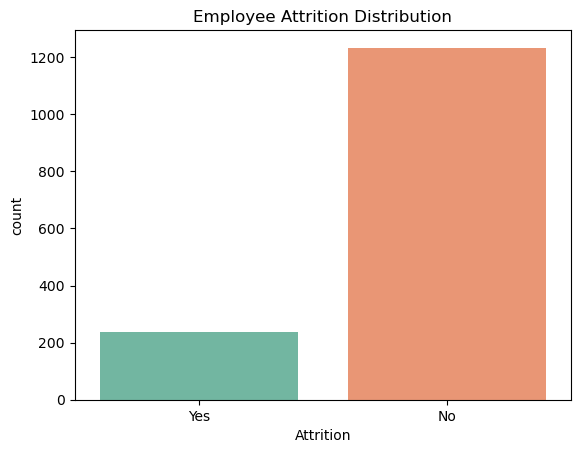

In [12]:
# Step 5: Visualize target variable
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Distribution')
plt.show()


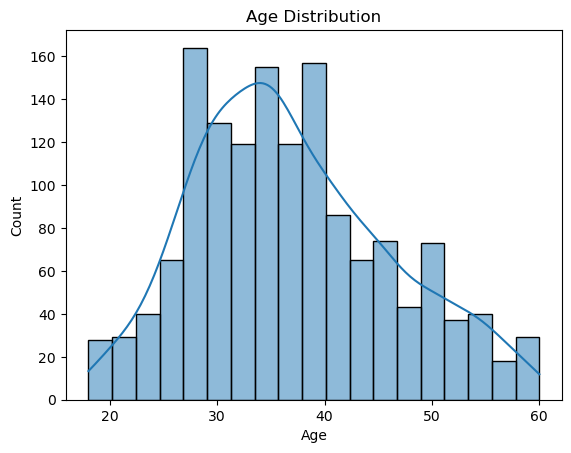

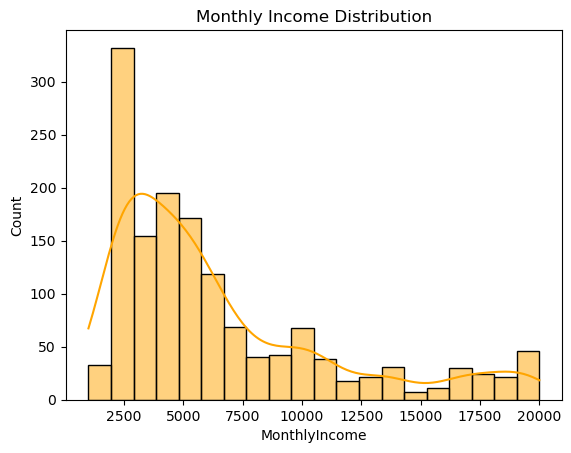

In [14]:
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Monthly income distribution
sns.histplot(df['MonthlyIncome'], kde=True, color='orange')
plt.title('Monthly Income Distribution')
plt.show()


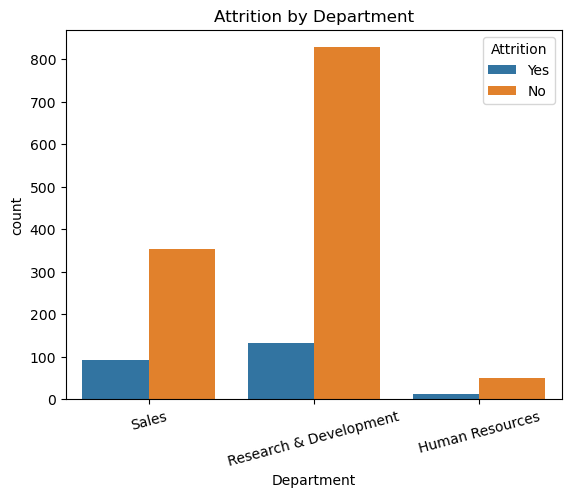

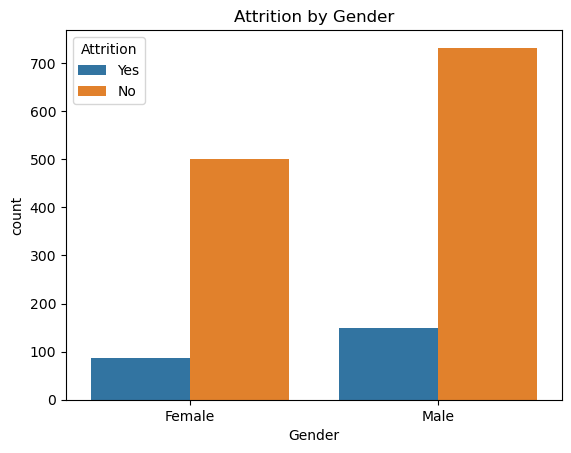

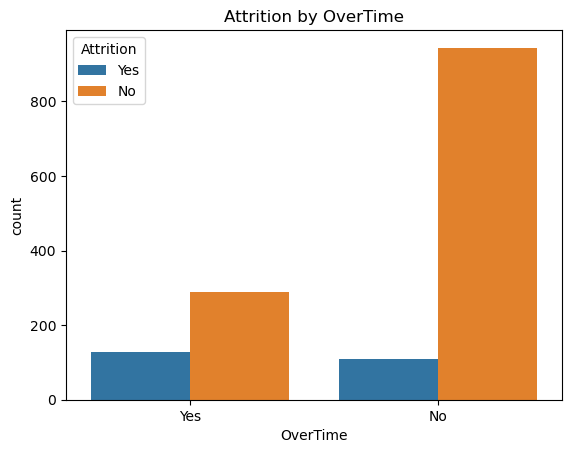

In [16]:
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=15)
plt.show()

# Attrition by Gender
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by Gender')
plt.show()

# Attrition by Overtime
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('Attrition by OverTime')
plt.show()


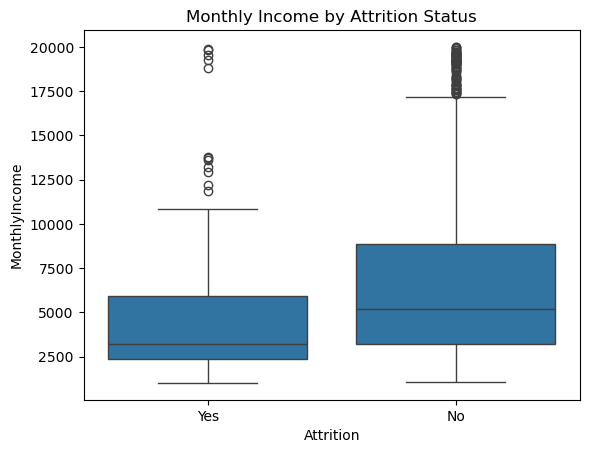

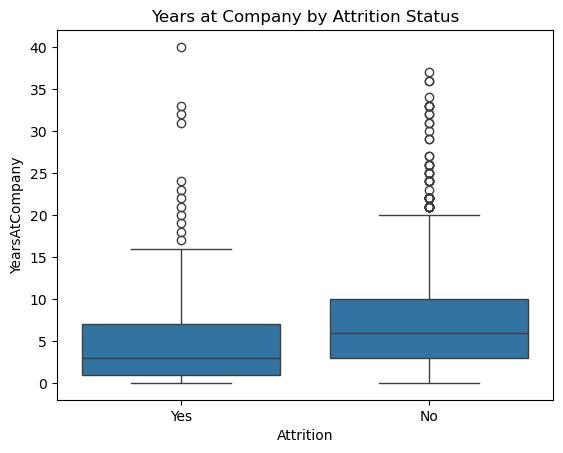

In [20]:
# Monthly Income vs Attrition
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition Status')
plt.show()

# Years at Company vs Attrition
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Years at Company by Attrition Status')
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

# Drop unnecessary columns
df_encoded.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18', 'Attrition'], axis=1, inplace=True)

# Encode categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Add the target column (binary Attrition)
df_encoded['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [26]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, log_preds))

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("Decision Tree Results:\n")
print(classification_report(y_test, tree_preds))


Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       247
           1       0.94      0.32      0.48        47

    accuracy                           0.89       294
   macro avg       0.91      0.66      0.71       294
weighted avg       0.89      0.89      0.86       294

Decision Tree Results:

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       247
           1       0.53      0.19      0.28        47

    accuracy                           0.84       294
   macro avg       0.70      0.58      0.60       294
weighted avg       0.81      0.84      0.81       294



C:\Users\gaura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
